In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
params = np.zeros((1000,2))

In [3]:
for i in range(1000): 
  x = 2 * np.random.rand(100,1)
  y = 4 + 3 * x + np.random.rand(100,1)
  linear_model = LinearRegression()
  linear_model.fit(x,y)
  params[i] = [linear_model.coef_[0,0],linear_model.intercept_]

In [4]:
df = pd.DataFrame({'slope' : params[:,0], 'intercept' : params[:,1]})
df.head(5)

,slope,intercept
0,3.022140,4.539627
1,2.874089,4.630945
2,3.037839,4.507711
3,2.929877,4.567668
4,3.022547,4.492825


El promedio y la desviación estándar de los dos parámetros pendiente e intercepto después de 1000 ajustes es:

In [12]:
print('Promedio: \n', df.mean())
print('\nDesviación estándar: \n', df.std())

Promedio: 
 slope        2.998652
intercept    4.500185
dtype: float64

Desviación estándar: 
 slope        0.048543
intercept    0.056381
dtype: float64


In [88]:
df.describe()

,slope,intercept
count,1000.000000,1000.000000
mean,2.998652,4.500185
std,0.048543,0.056381
min,2.844333,4.331418
25%,2.966240,4.462039
50%,2.997743,4.500266
75%,3.031218,4.539269
max,3.147036,4.665275


Para facilitar el análisis escalemos los datos extrayendo la media y normalizando con la desviación estándar

In [87]:
df2 = (df - df.mean())/df.std()

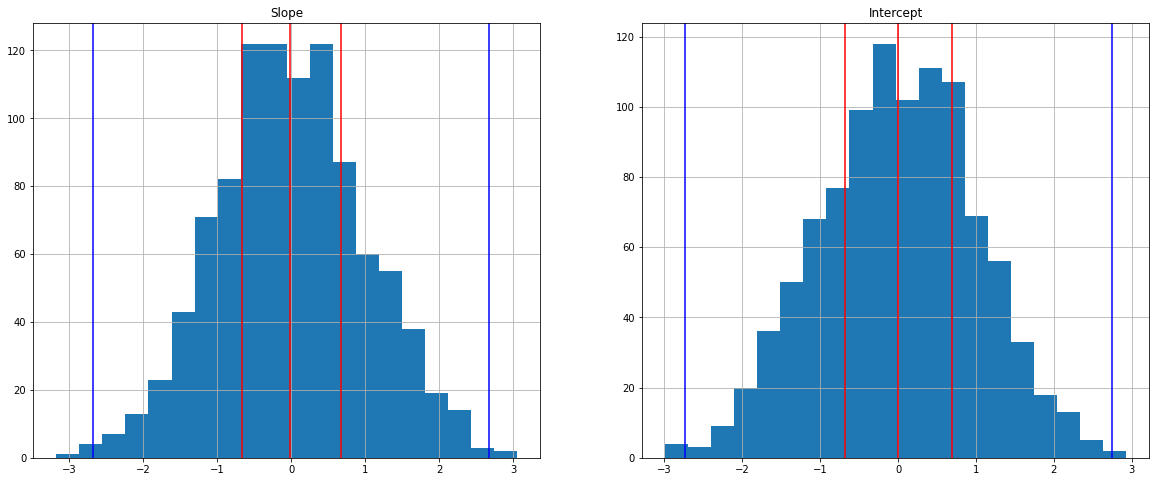

In [95]:
q_slp = df2.slope.describe()[4:7]
q_int = df2.intercept.describe()[4:7]
iqr_slp = q_slp[-1] - q_slp[0]
iqr_int = q_int[-1] - q_int[0]

fig, axs = plt.subplots(1, 2, figsize=(20, 8))
df2.slope.hist(bins=20, ax=axs[0], grid=True)
df2.intercept.hist(bins=20, ax=axs[1], grid=True)
axs[0].set_title('Slope')
axs[1].set_title('Intercept')

axs[0].vlines([q_slp.values], ymin = 0, ymax = 1,transform=axs[0].get_xaxis_transform(),  colors='r', linestyles='solid')
axs[0].vlines([q_slp[0] - 1.5*iqr_slp, q_slp[-1] + 1.5*iqr_slp], ymin = 0, ymax = 1,transform=axs[0].get_xaxis_transform(),  colors='b', linestyles='solid')

axs[1].vlines([q_int.values], ymin = 0, ymax = 1,transform=axs[1].get_xaxis_transform(),  colors='r', linestyles='solid')
axs[1].vlines([q_int[0] - 1.5*iqr_int, q_int[-1] + 1.5*iqr_int], ymin = 0, ymax = 1,transform=axs[1].get_xaxis_transform(),  colors='b', linestyles='solid')

Las líneas rojas representan de izquierda a derecha los cuartiles $Q_1, Q_2$ y $Q_3$ respectivamente y las líneas azules $Q_1 - 1.5\times IQR$ y $Q_3+1.5\times IQR$ 

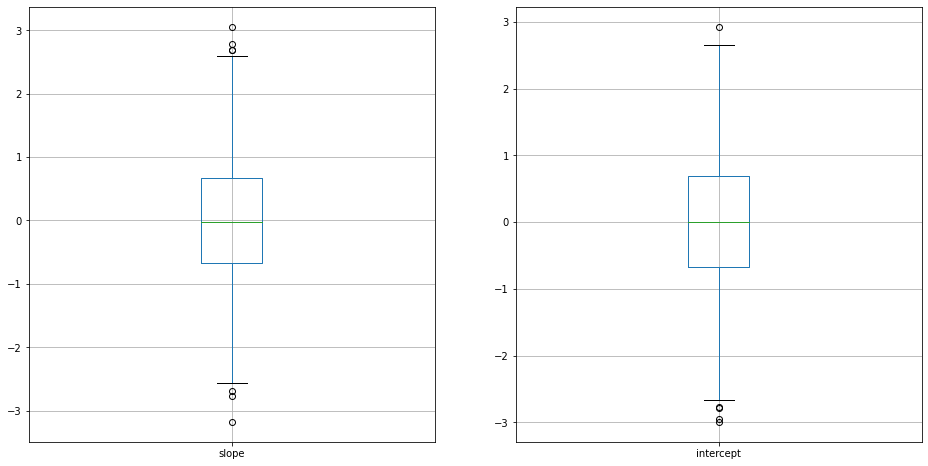

In [96]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
df2.boxplot('slope', ax=axs[0], grid=True)
df2.boxplot('intercept', ax=axs[1], grid=True)

El *np.random.rand* da número aleatorios entre [0,1) con igual probabilidad y por tanto el promedio de una muestra grande se acerca a *0.5*.

$$\overline{[0,1)} \approx 0.5$$

Entonces el promedio de la pendiente es:

$$\overline{6\times[0,1)} = 6 \times \overline{[0,1)} \approx 3$$

 y el promedio del intercepto es
 
 $$\overline{4+[0,1)} = 4+\overline{[0,1)} \approx 4.5$$.

 Lo que concuerda con los dos resultados obtenidos para los valores promedio. Las desviaciones estándar podemos ver que son muy pequeñas respecto a la media
  $(<3\%)$ lo que hace que en ambos conjuntos de datos los valores no se alejen mucho del valor central. Podemos ver de ambos histogramas que los datos parecen seguir una distribución gaussiana bastante simétrica ya que la mediana ($Q_2$) está muy cerca del cero. El $IQR$ también es bajo y podemos ver que el más del $50\%$ de los datos están a menos de $1\sigma$ de distancia lo que muestra que los datos no están muy dispersos en ambos parámetros.